# 基于VGG16、结合mlp实现猫狗识别
使用VGG16的结构提取图像特征，再根据特征建立mlp模型，实现猫狗图像识别。  
训练、测试数据：dataset\data_vgg:  
1、对数据进行分离，计算测试数据预测准确率  
2、从网站下载猫、狗图片，对其进行预测  
mlp模型一个隐藏层，10个神经元

In [15]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'
#load the data
from keras.preprocessing.image import load_img, img_to_array
img_path = 'images/1.jpg'
img = load_img(img_path, target_size=(224, 224))
img = img_to_array(img)

In [16]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np
model_vgg = VGG16(weights='imagenet', include_top=False)
x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

In [17]:
#特征提取
features = model_vgg.predict(x)
features.shape

(1, 7, 7, 512)

In [4]:
#flatten
features = features.reshape(1, 7 * 7 * 512)

In [5]:
#load image and preprocess it with vgg16 structure
from keras.preprocessing.image import img_to_array, load_img
from keras.applications.vgg16 import VGG16, preprocess_input
import numpy as np

model_vgg = VGG16(weights='imagenet', include_top=False)


#define a method to load and preprocess the image
def modelProcess(img_path, model):
    img = load_img(img_path, target_size=(224, 224))
    img = img_to_array(img)
    x = np.expand_dims(img, axis=0)
    x = preprocess_input(x)
    x_vgg = model.predict(x)
    x_vgg = x_vgg.reshape(1, 25088)
    return x_vgg


#list file names of the training datasets
import os
folder = "dataset/data_vgg/cats"
dirs = os.listdir(folder)
#generate path for the images
img_path = []
for i in dirs:
    if os.path.splitext(i)[1] == ".jpg":
        img_path.append(i)
img_path = [folder + '/' + i for i in img_path]

#preprocess multiple images
features1 = np.zeros([len(img_path), 25088])
for i in range(len(img_path)):
    feature_i = modelProcess(img_path[i], model_vgg)
    print('preprocessed:', img_path[i])
    features1[i] = feature_i

folder = 'dataset/data_vgg/dogs'
dirs = os.listdir(folder)
#generate path for the images
img_path = []
for i in dirs:
    if os.path.splitext(i)[1] == ".jpg":
        img_path.append(i)
img_path = [folder + '/' + i for i in img_path]
features2 = np.zeros([len(img_path), 25088])
for i in range(len(img_path)):
    feature_i = modelProcess(img_path[i], model_vgg)
    print('preprocessed:', img_path[i])
    features2[i] = feature_i

#label the results
print(features1.shape, features2.shape)
y1 = np.zeros(300)
y2 = np.ones(300)

#generate the training data
X = np.concatenate((features1, features2), axis=0)
y = np.concatenate((y1, y2), axis=0)
y = y.reshape(-1, 1)
print(X.shape, y.shape)

preprocessed: dataset/data_vgg/cats/cat.6.jpg
preprocessed: dataset/data_vgg/cats/cat.239.jpg
preprocessed: dataset/data_vgg/cats/cat.211.jpg
preprocessed: dataset/data_vgg/cats/cat.205.jpg
preprocessed: dataset/data_vgg/cats/cat.198.jpg
preprocessed: dataset/data_vgg/cats/cat.30.jpg
preprocessed: dataset/data_vgg/cats/cat.24.jpg
preprocessed: dataset/data_vgg/cats/cat.167.jpg
preprocessed: dataset/data_vgg/cats/cat.18.jpg
preprocessed: dataset/data_vgg/cats/cat.173.jpg
preprocessed: dataset/data_vgg/cats/cat.172.jpg
preprocessed: dataset/data_vgg/cats/cat.19.jpg
preprocessed: dataset/data_vgg/cats/cat.166.jpg
preprocessed: dataset/data_vgg/cats/cat.25.jpg
preprocessed: dataset/data_vgg/cats/cat.31.jpg
preprocessed: dataset/data_vgg/cats/cat.199.jpg
preprocessed: dataset/data_vgg/cats/cat.204.jpg
preprocessed: dataset/data_vgg/cats/cat.210.jpg
preprocessed: dataset/data_vgg/cats/cat.238.jpg
preprocessed: dataset/data_vgg/cats/cat.7.jpg
preprocessed: dataset/data_vgg/cats/cat.5.jpg
prep

preprocessed: dataset/data_vgg/cats/cat.244.jpg
preprocessed: dataset/data_vgg/cats/cat.250.jpg
preprocessed: dataset/data_vgg/cats/cat.65.jpg
preprocessed: dataset/data_vgg/cats/cat.71.jpg
preprocessed: dataset/data_vgg/cats/cat.59.jpg
preprocessed: dataset/data_vgg/cats/cat.132.jpg
preprocessed: dataset/data_vgg/cats/cat.126.jpg
preprocessed: dataset/data_vgg/cats/cat.127.jpg
preprocessed: dataset/data_vgg/cats/cat.133.jpg
preprocessed: dataset/data_vgg/cats/cat.58.jpg
preprocessed: dataset/data_vgg/cats/cat.70.jpg
preprocessed: dataset/data_vgg/cats/cat.64.jpg
preprocessed: dataset/data_vgg/cats/cat.251.jpg
preprocessed: dataset/data_vgg/cats/cat.245.jpg
preprocessed: dataset/data_vgg/cats/cat.279.jpg
preprocessed: dataset/data_vgg/cats/cat.292.jpg
preprocessed: dataset/data_vgg/cats/cat.286.jpg
preprocessed: dataset/data_vgg/cats/cat.282.jpg
preprocessed: dataset/data_vgg/cats/cat.296.jpg
preprocessed: dataset/data_vgg/cats/cat.241.jpg
preprocessed: dataset/data_vgg/cats/cat.255.jp

preprocessed: dataset/data_vgg/dogs/dog.202.jpg
preprocessed: dataset/data_vgg/dogs/dog.228.jpg
preprocessed: dataset/data_vgg/dogs/dog.214.jpg
preprocessed: dataset/data_vgg/dogs/dog.200.jpg
preprocessed: dataset/data_vgg/dogs/dog.33.jpg
preprocessed: dataset/data_vgg/dogs/dog.27.jpg
preprocessed: dataset/data_vgg/dogs/dog.162.jpg
preprocessed: dataset/data_vgg/dogs/dog.176.jpg
preprocessed: dataset/data_vgg/dogs/dog.189.jpg
preprocessed: dataset/data_vgg/dogs/dog.188.jpg
preprocessed: dataset/data_vgg/dogs/dog.177.jpg
preprocessed: dataset/data_vgg/dogs/dog.163.jpg
preprocessed: dataset/data_vgg/dogs/dog.26.jpg
preprocessed: dataset/data_vgg/dogs/dog.32.jpg
preprocessed: dataset/data_vgg/dogs/dog.201.jpg
preprocessed: dataset/data_vgg/dogs/dog.215.jpg
preprocessed: dataset/data_vgg/dogs/dog.229.jpg
preprocessed: dataset/data_vgg/dogs/dog.272.jpg
preprocessed: dataset/data_vgg/dogs/dog.266.jpg
preprocessed: dataset/data_vgg/dogs/dog.299.jpg
preprocessed: dataset/data_vgg/dogs/dog.104.

preprocessed: dataset/data_vgg/dogs/dog.65.jpg
preprocessed: dataset/data_vgg/dogs/dog.120.jpg
preprocessed: dataset/data_vgg/dogs/dog.134.jpg
preprocessed: dataset/data_vgg/dogs/dog.59.jpg
preprocessed: dataset/data_vgg/dogs/dog.135.jpg
preprocessed: dataset/data_vgg/dogs/dog.58.jpg
preprocessed: dataset/data_vgg/dogs/dog.121.jpg
preprocessed: dataset/data_vgg/dogs/dog.109.jpg
preprocessed: dataset/data_vgg/dogs/dog.64.jpg
preprocessed: dataset/data_vgg/dogs/dog.70.jpg
preprocessed: dataset/data_vgg/dogs/dog.280.jpg
preprocessed: dataset/data_vgg/dogs/dog.294.jpg
preprocessed: dataset/data_vgg/dogs/dog.243.jpg
preprocessed: dataset/data_vgg/dogs/dog.257.jpg
preprocessed: dataset/data_vgg/dogs/dog.230.jpg
preprocessed: dataset/data_vgg/dogs/dog.224.jpg
preprocessed: dataset/data_vgg/dogs/dog.218.jpg
preprocessed: dataset/data_vgg/dogs/dog.146.jpg
preprocessed: dataset/data_vgg/dogs/dog.152.jpg
preprocessed: dataset/data_vgg/dogs/dog.17.jpg
preprocessed: dataset/data_vgg/dogs/dog.185.jp

In [6]:
#split the training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=50)
print(X_train.shape, X_test.shape, X.shape)

(420, 25088) (180, 25088) (600, 25088)


In [7]:
#set up the mlp model
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(units=10, activation='relu', input_dim=25088))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                250890    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 250,901
Trainable params: 250,901
Non-trainable params: 0
_________________________________________________________________


In [8]:
#configure the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
#train the model
model.fit(X_train, y_train, epochs=50)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/50
420/420 [==============================] - 1s 3ms/step - loss: 0.9782 - accuracy: 0.8690
Epoch 2/50
420/420 [==============================] - 0s 603us/step - loss: 0.0969 - accuracy: 0.9262
Epoch 3/50
420/420 [==============================] - 0s 611us/step - loss: 0.0671 - accuracy: 0.9810
Epoch 4/50
420/420 [==============================] - 0s 629us/step - loss: 0.0313 - accuracy: 0.9929
Epoch 5/50
420/420 [==============================] - 0s 623us/step - loss: 0.0295 - accuracy: 0.9929
Epoch 6/50
420/420 [==============================] - 0s 609us/step - loss: 0.0141 - accuracy: 1.0000
Epoch 7/50
420/420 [==============================] - 0s 610us/step - loss: 0.0131 - accuracy: 1.0000
Epoch 8/50
420/420 [==============================] - 0s 581us/step - loss: 0.0131 - accuracy: 1.0000
Epoch 9/50
420/420 [==============================] - 0s 609us/step - loss: 0.0131 - accurac

In [18]:
from sklearn.metrics import accuracy_score
y_train_predict = model.predict_classes(X_train)
y_test_predict = model.predict_classes(X_test)
accuracy_train = accuracy_score(y_train, y_train_predict)
accuracy_test = accuracy_score(y_test, y_test_predict)
print('accuracy_train:', accuracy_train)
print('accuracy_test :', accuracy_test)

accuracy_train: 1.0
accuracy_test : 0.9555555555555556


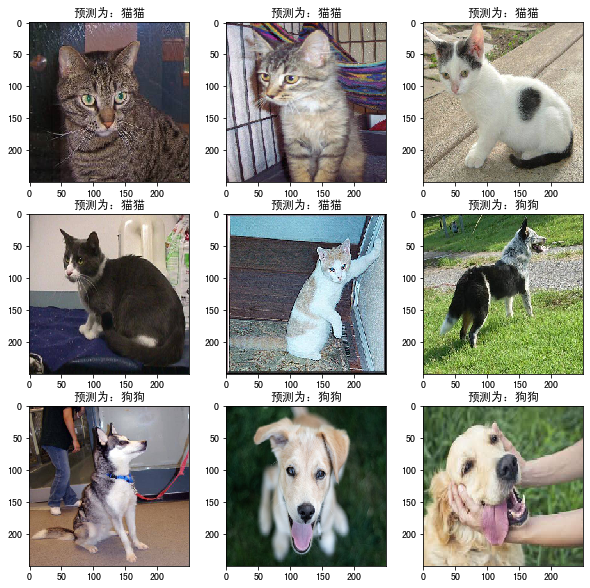

In [10]:
from matplotlib import pyplot as plt
from matplotlib.image import imread
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
#from cv2 import load_img
a = [i for i in range(1, 10)]
fig = plt.figure(figsize=(10, 10))
for i in a:
    img_name = 'images/' + str(i) + '.jpg'
    img_path = img_name
    img = load_img(img_path, target_size=(224, 224))
    img = img_to_array(img)
    x = np.expand_dims(img, axis=0)
    x = preprocess_input(x)
    x_vgg = model_vgg.predict(x)
    x_vgg = x_vgg.reshape(1, 25088)
    result = model.predict_classes(x_vgg)
    img_ori = load_img(img_name, target_size=(250, 250))
    plt.subplot(3, 3, i)
    plt.imshow(img_ori)
    plt.title('预测为：狗狗' if result[0][0] == 1 else '预测为：猫猫')
plt.show()

基于VGG16、结合mlp实现猫狗识别图像实战summary：  
1、基于经典的VGG16结构，实现了图像识别模型的快速搭建与训练，并完成猫狗识别任务  
2、掌握了拆分已经训练好的模型结构的方法，实现对其灵活应用  
3、更熟练的运用mlp模型，并将其与其他模型相结合，实现更复杂的任务  
4、通过VGG16+MLP的模型，实现了在小数据集情况下的模型快速训练并获得较高的准确率